# Visibility Simulator Examples

Although ``hera_sim`` is primarily aimed at simulating instrumental effects _on top_ of existing visibility simulations, it also provides a neat interface to several visibility simulators.

It does so through the base class ``VisibilitySimulator``, which sets a standard API from which all simulators must derive.

## VisCPU

In [1]:
from hera_sim.visibilities import VisCPU, HealVis
from hera_sim import io
import numpy as np
import healpy
import matplotlib.pyplot as plt
import itertools
from pyuvsim.analyticbeam import AnalyticBeam

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [10]:
def plot_blts(simulator):
    fig, ax = plt.subplots(2, 1, sharex=True, 
                           subplot_kw={"ylabel":"|Visibility| [Jy]"})

    for i in simulator.uvdata.antenna_numbers:
        auto_ind = simulator.uvdata.antpair2ind((i,i))

        ax[0].plot(np.unique(simulator.uvdata.lst_array), np.abs(simulator.uvdata.data_array[auto_ind, 0, 0, 0]), label="ant_{}".format(i))

        for j in simulator.uvdata.antenna_numbers[(i+1):]:
            cross_ind = simulator.uvdata.antpair2ind((i,j))
            ax[1].plot(np.unique(simulator.uvdata.lst_array), np.abs(simulator.uvdata.data_array[cross_ind, 0, 0, 0]), label="bl({},{})".format(i,j))

    ax[0].legend()
    ax[1].legend()
    ax[0].set_title("Autocorrelations")
    ax[1].set_title("Cross-Correlations")
    ax[1].set_xlabel("LST");

``VisCPU`` natively deals with diffuse emission, and the ``VisibilitySimulator`` uses ``healpix`` maps to represent such emission:

In [3]:
NSIDE = 2**5
NPIX = 12 * NSIDE**2 # this is the number of pixels a healpix map has for  given NSIDE

# Create a pure white noise sky
sky_intensity = np.array([np.random.normal(100, 0.01, size=NPIX)]*5)

Other than the sky model (we'll revisit this soon), the ``VisibilitySimulator`` requires a ``UVData`` object to specify the observation parameters, as well as a list of ``UVBeam``s to specify the beams for each antenna. This makes it fully consistent with the interface provided by ``pyuvsim``, and many of the methods found in ``pyuvsim`` for creating ``UVData`` objects and ``UVBeam`` objects from YAML specifications can be used here. Indeed, a dictionary of so-called ``obsparams``, or a file-name for an appropriate YAML file, can be passed in lieu of the ``UVData`` and ``UVBeam``. 

For simplicity, let us simply use the native ``empty_uvdata`` function instead:

In [6]:
def myuvdata():
    return io.empty_uvdata(
        nfreq = 5,
        ntimes= 10,
        ants = {
            0: (0,0,0),
            1: (20,20,0),
            2: (-20,20,0),
        },
        antpairs = sum([[(a,b) for a in range(3)] for b in range(3)], [])
    )

freqs = np.unique(myuvdata().freq_array)

In [7]:
simulator = VisCPU(
    uvdata = myuvdata(),
    sky_intensity = sky_intensity,
    sky_freqs = freqs,
)

In [31]:
crdeq= simulator.get_crd_eq()

In [32]:
np.sum(crdeq[2])

12288.0

In [12]:
vis = simulator.simulate()

invalid value encountered in sqrt


('adding ', array([[[ 5.54646875e+05-3.41584127e-05j,
         -5.95905225e+03-3.15094751e+03j,
         -8.39127808e+02+8.73521094e+03j],
        [-5.95905225e+03+3.15094751e+03j,
          5.54646875e+05-1.18322016e-04j,
          3.41967773e+01-6.19927734e+02j],
        [-8.39127808e+02-8.73521094e+03j,
          3.41967773e+01+6.19927734e+02j,
          5.54646875e+05-0.00000000e+00j]],

       [[ 5.54633500e+05-2.78168718e-05j,
          2.90350049e+03+6.48450488e+03j,
         -4.88530127e+03-1.29863513e+03j],
        [ 2.90350049e+03-6.48450488e+03j,
          5.54633500e+05+5.75771310e-06j,
         -2.26000977e+03+4.00509216e+02j],
        [-4.88530127e+03+1.29863513e+03j,
         -2.26000977e+03-4.00509216e+02j,
          5.54633500e+05-0.00000000e+00j]],

       [[ 5.54624000e+05+7.38185408e-05j,
          2.52929785e+03+6.62891016e+03j,
          7.39811279e+03+2.59361206e+02j],
        [ 2.52929785e+03-6.62891016e+03j,
          5.54624000e+05+2.59646222e-05j,
          3

('adding ', array([[[ 5.5464688e+05+1.13259935e-04j, -7.7556726e+02-4.60124463e+03j,
          3.2850061e+03-2.09622119e+03j],
        [-7.7556726e+02+4.60124463e+03j,  5.5464688e+05-5.98351980e-05j,
         -7.4629683e+03+1.14583125e+04j],
        [ 3.2850061e+03+2.09622119e+03j, -7.4629683e+03-1.14583125e+04j,
          5.5464694e+05-0.00000000e+00j]],

       [[ 5.5463350e+05+9.56385993e-05j, -1.0591042e+04+1.84924353e+03j,
         -8.8881729e+03+2.63935010e+03j],
        [-1.0591042e+04-1.84924353e+03j,  5.5463350e+05+9.47831868e-05j,
          6.4880122e+03-1.64618945e+03j],
        [-8.8881729e+03-2.63935010e+03j,  6.4880122e+03+1.64618945e+03j,
          5.5463350e+05-0.00000000e+00j]],

       [[ 5.5462400e+05+9.92490095e-05j, -3.1955498e+03-6.27231152e+03j,
         -7.7435645e+02-1.84726013e+03j],
        [-3.1955498e+03+6.27231152e+03j,  5.5462400e+05-4.28349704e-05j,
          2.9421311e+03-1.62578137e+03j],
        [-7.7435645e+02+1.84726013e+03j,  2.9421311e+03+1.625781

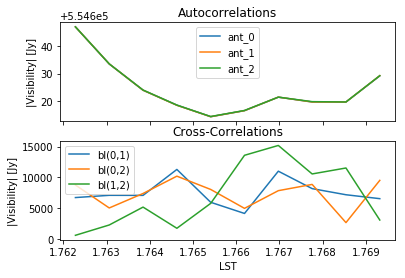

In [13]:
plot_blts(simulator)

In [38]:
simulator.uvdata.data_array

array([[[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [0.+0.j]]],


       [[[

In this, the beam was not set, and therefore the beam was assumed to be unity everywhere above the horizon. The beam can be set as a series of healpix maps, one for each antenna. 
An extra list of ``beam_ids`` specifies which of the beams each antenna uses. So, we can create something like a Gaussian beam:

In [8]:
simulator = VisCPU(
    uvdata = myuvdata(),
    sky_intensity = sky_intensity,
    sky_freqs = np.unique(uvdata.freq_array),
    beams = [AnalyticBeam("gaussian", diameter=14)]
)

In [9]:
vis = simulator.simulate()

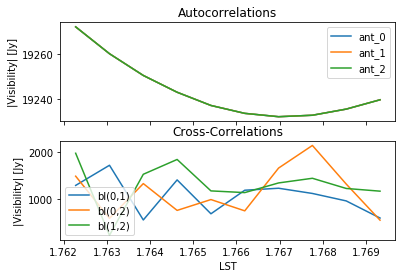

In [10]:
plot_blts(simulator)

## HealVis

We could also have used healvis for this:

In [11]:
simulator = HealVis(
    uvdata = deepcopy(uvdata),
    sky_freqs = uvdata.freq_array[0],
    sky_intensity = sky_intensity,
)

In [12]:
vis = simulator.simulate()

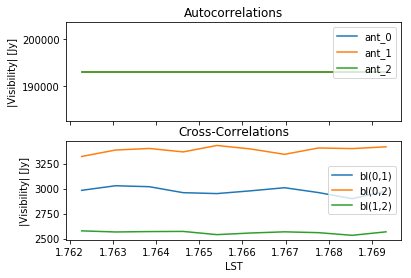

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True, 
                       subplot_kw={"ylabel":"|Visibility| [Jy]"})

for i in range(3):
    auto_ind = uvdata.antpair2ind((i,i))
    
    ax[0].plot(np.unique(uvdata.lst_array), np.abs(simulator.uvdata.data_array[auto_ind, 0, 0, 0]), label="ant_{}".format(i))
    
    for j in range(3)[(i+1):]:
        cross_ind = uvdata.antpair2ind((i,j))
        ax[1].plot(np.unique(uvdata.lst_array), np.abs(simulator.uvdata.data_array[cross_ind, 0, 0, 0]), label="bl({},{})".format(i,j))

ax[0].legend()
ax[1].legend()
ax[0].set_title("Autocorrelations")
ax[1].set_title("Cross-Correlations")
ax[1].set_xlabel("LST");